In [9]:
import numpy as np
import h5py
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_style('white')
sns.set_context('poster')

In [10]:
dataFile = 'data.mat'
file = h5py.File(dataFile,'r')
experimentData = file['experimentData']
keys = list(experimentData.keys())
numTrials, numPositions, numGestures = experimentData[keys[0]].shape
D = file[experimentData[keys[3]][0,0,0]].shape[1]
numEx = 80

In [11]:
totalEx = numEx*numTrials*numPositions*numGestures

x = np.zeros(totalEx)
y = np.zeros(totalEx)
z = np.zeros(totalEx)
pos = np.zeros(totalEx)

idx = np.arange(numEx).astype('int')

for p in range(numPositions):
    for g in range(numGestures):
        for t in range(numTrials):
            expLabel = file[experimentData['expGestLabel'][t,p,g]][0,:]
            accFeat = file[experimentData['accFeat'][t,p,g]][:,expLabel>0].T
            x[idx] = accFeat[:,0]
            y[idx] = accFeat[:,1]
            z[idx] = accFeat[:,2]
            pos[idx] = p
            idx += numEx

In [20]:
list(pal)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

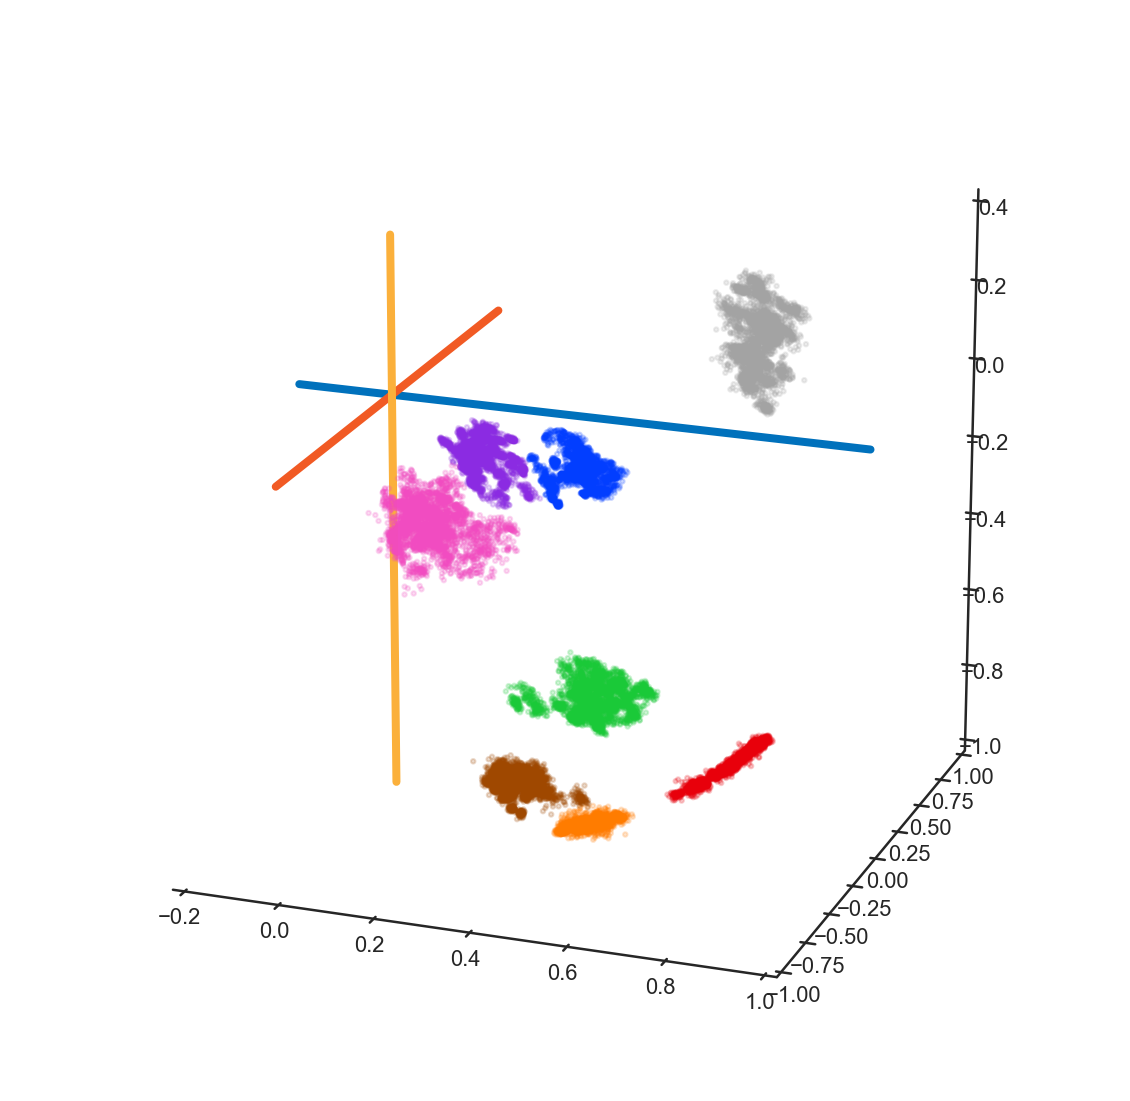

In [65]:
pal = sns.color_palette('bright',numPositions)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

for p in range(numPositions):
    ax.scatter(x[pos==p],y[pos==p],z[pos==p],c=pal[p],alpha=0.2)
    
    
lim = 1
lw = 8
xlim = [-0.2,1]
ylim = [-1,1]
zlim = [-1,0.4]

ax.plot(xlim,[0,0],[0,0],'#0071BC',linewidth=lw)
ax.plot([0,0],ylim,[0,0],'#F15A24',linewidth=lw)
ax.plot([0,0],[0,0],zlim,'#FBB03B',linewidth=lw)
    
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# ax.set_xlim((-lim,lim))
# ax.set_ylim((-lim,lim))
# ax.set_zlim((-lim,lim))

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

ax.view_init(elev=20, azim=290)

ax.grid(False)

# plt.show()
plt.savefig('imu_scatter.png')